## Results calculated on 2020-10-15

### Input: 

1. Strategies included in the `providerCreditsPackages (pcp)` table. (Trading plans purchased.)
    Strategies having at least 4 trades selected. See more below.
2. "Killing events" from tables `systems_killed` and `systems_killed_soft` applied.
3. Accounts equities for strategies downloaded from the `accountequity` table.
4. Default commissions from the `totalComm` table subtracted from equities.


- Strategies from `providerCreditsPackages` are selected using this condition:
`pcp.package <> 'basic_trial' AND (pcp.disposition IS NULL OR pcp.disposition <> 'archivedTrial')`
and a number of trades must be gretaer or equal to 4. (See Matthew's code `modern_historical_stats_worker.pl` on Slack.)

- "killing" conditions are applied on the strategies set selected from the `pcp` table then.

- Accounts eqities are converted to the daily periodicity including weekends.

**We are using a rolling window of 210 days of returns over 30 days. It means we need at least 210 + 30 days long systems.**

In [2]:
# Load packages and helper functions used in this description
source("JupyterUtils.R")

MINIMUM_NEEDED_DAYS = 210
REURNS_MONTHLY_DAYS = 30
MIN_AGE = MINIMUM_NEEDED_DAYS + REURNS_MONTHLY_DAYS

TODAY="2020-10-20"

[1] "Initialization done"


In [13]:
# Let's do some data investigation

tablesStats = c2DatabaseStats()

cat("--------- Some tables numbers ---------\n")

cat(sprintf("Strategies selected from `providerCreditsPackages` (min date = 2016-10-19 in the table): %d\n",tablesStats$systems_providerCreditsPackages))
cat(sprintf("Strategies selected from `providerCreditsPackages` having more than 4 trades: %d\n",tablesStats$systems_pcp_ge_4_trades))
cat(sprintf("Strategies in `systems_killed_soft` (min date = 2003-10-24 in the table): %d \n",tablesStats$systems_killed_soft))
cat(sprintf("Strategies in `systems_killed` (min date = 2015-06-05 in the table): %d \n",tablesStats$systems_killed))

cat("\nThe oldest strategies on Collective2 are from 2003 so apparently,\n", 
    "we should verify that the queries from the above tables starting in 2015 and 2016 do not skip some 'old good' strategies.\n",
    "Let's use strategies found in the `providerCreditsPackages` (C2 license fees paid) for now.\n\n")

cat("After applying killing events to strategies in `providerCreditsPackages` having more than 4 trades (PCP4)\n we have the following numbers:\n\n")

cat(sprintf("PCP4 strategies avg life span: %.1f days\n",tablesStats$avg_life_span))
cat(sprintf("PCP4 strategies live at least MIN_AGE=%d days: %d\n",MIN_AGE,tablesStats$live_ge_240_days))

#print("The above numbers are So we are going to work with %d strategies today. We investigate them from they starting dates. But many of them are already killed today, on %s.",tablesStats$live_ge_240_days,TODAY))
#print(sprintf("So we are going to work with %d strategies today. We investigate them from they starting dates. But many of them are already killed today, on %s.",tablesStats$live_ge_240_days,TODAY))

--------- Some tables numbers ---------
Strategies selected from `providerCreditsPackages` (min date = 2016-10-19 in the table): 27326
Strategies selected from `providerCreditsPackages` having more than 4 trades: 6091
Strategies in `systems_killed_soft` (min date = 2003-10-24 in the table): 50918 
Strategies in `systems_killed` (min date = 2015-06-05 in the table): 13839 

The oldest strategies on Collective2 are from 2003 so apparently,
 we should verify that the queries from the above tables starting in 2015 and 2016 do not skip some 'old good' strategies.
 Let's use strategies found in the `providerCreditsPackages` (C2 license fees paid) for now.

After applying killing events to startegies in `providerCreditsPackages` having more than 4 trades (PCP4)
 we have the following numbers:

PCP4 strategies avg life span: 204.3 days
PCP4 strategies live at least MIN_AGE=240 days: 1318


What PCP4 systems ages are?


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  242.0   348.2   491.5   687.9   760.0  5719.0 

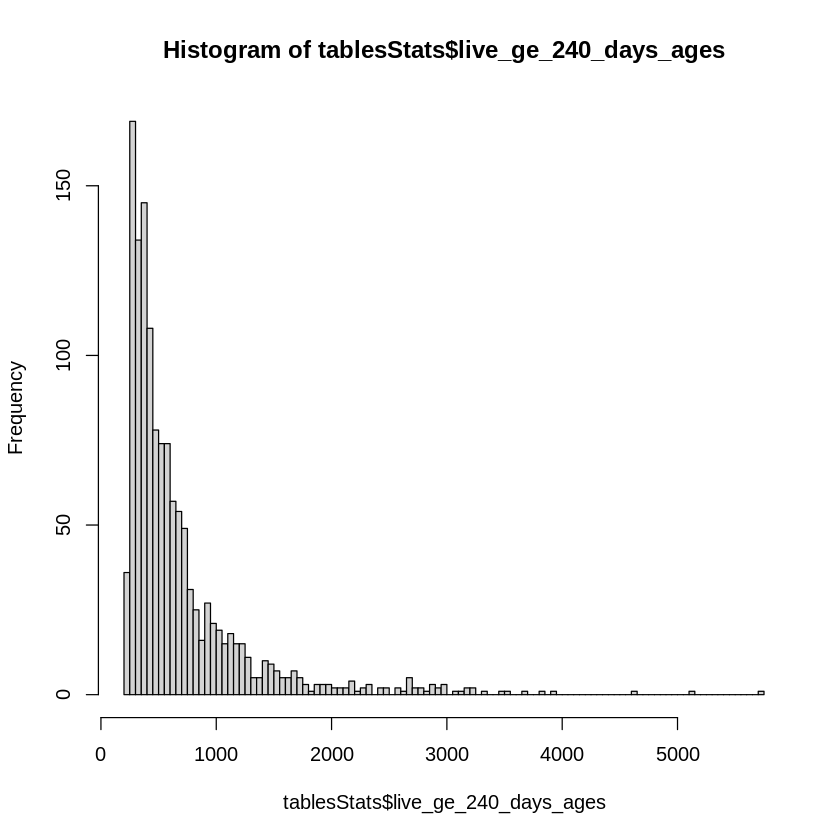

In [17]:
cat("What PCP4 systems ages are?\n")
summary(tablesStats$live_ge_240_days_ages)
agesHistogram = hist(tablesStats$live_ge_240_days_ages,breaks=100)

In [31]:
# Some PCP4 systems age details (ages > 240 already selected)
ages = tablesStats$live_ge_240_days_ages
maxOneYearOld = length(ages[ages <= 365])
maxTwoYearsOld = length(ages[ages > 365 & ages <= 2*365])
olderThanTwoYears = length(ages[ages > 2*365])
print(sprintf("PCP4 systems %d - 365 days old: %.0f",MIN_AGE, maxOneYearOld))
print(sprintf("PCP4 systems 1-2 years old: %.0f",maxTwoYearsOld))
print(sprintf("PCP4 systems more than 2 years old: %.0f",olderThanTwoYears))

[1] "PCP4 systems 240 - 365 days old: 389"
[1] "PCP4 systems 1-2 years old: 574"
[1] "PCP4 systems more than 2 years old: 355"


## Results calculated on 2020-10-15


Here is the first result. It is sorted by ProformaReturns210 descending.

(That "Bond USA" system crashed AFTER 2020-10-15. It means after I downloaded C2 data created this report.)

<https://svancara.github.io/CarltonIndex/docs/results-2020-10-15.html>